#### import python libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#### load dataset

In [24]:
data=pd.read_csv("C:/Users/dell/OneDrive/Desktop/titanic data.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
data.shape

(891, 12)

In [12]:
data.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [16]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [22]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### data cleaning

In [29]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [33]:
data.dropna(inplace=True)

In [ ]:
data = data.drop(['Cabin'], axis=1)

### EXPLORATORY ANALYSIS

#### survival based on gender

In [63]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

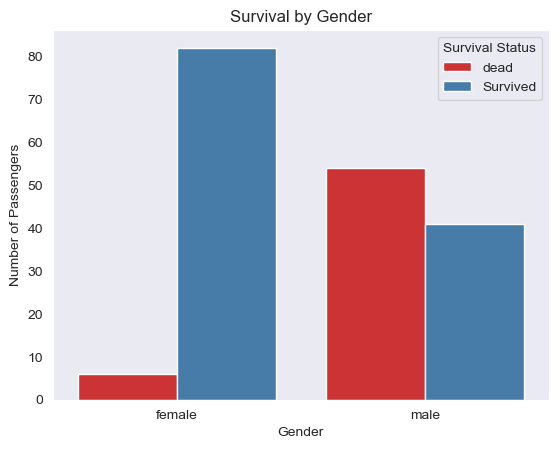

In [248]:
survival_by_gender = data.groupby('Sex')['Survived'].sum()
sns.countplot(data = data,x='Sex', hue='Survived',palette='Set1')
plt.title('Survival by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Passengers')
plt.legend(title='Survival Status', loc='upper right', labels=['dead', 'Survived'])
plt.show()

#### survival based on p_Class

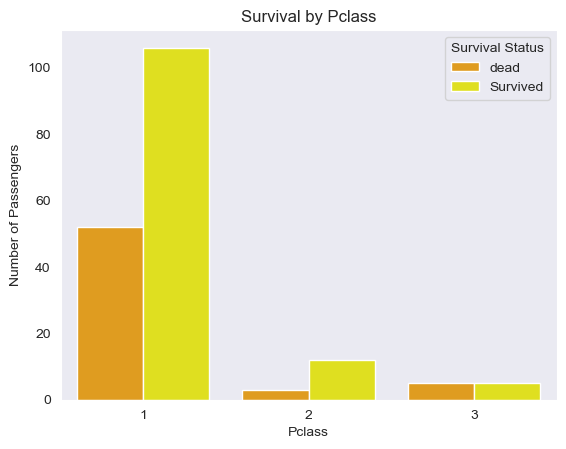

In [232]:
survival_by_gender = data.groupby('Pclass')['Survived'].sum()
colors = ["orange", "yellow"]
sns.countplot(x='Pclass', hue='Survived', data=data, palette=colors)
plt.title('Survival by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Number of Passengers')
plt.legend(title='Survival Status', loc='upper right', labels=['dead', 'Survived'])
plt.show()

#### survival based on passenger class

#### analyze fare and survival rate

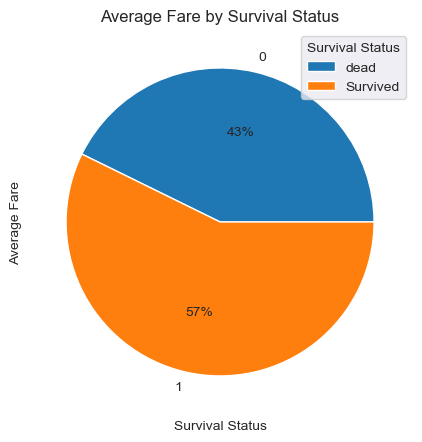

In [230]:
fare_by_survival = data.groupby('Survived')['Fare'].mean()
fare_by_survival.plot(kind='pie', y='Values', autopct='%1.0f%%', figsize=(5, 5))
plt.title('Average Fare by Survival Status')
plt.xlabel('Survival Status')
plt.ylabel('Average Fare')
plt.legend(title='Survival Status', loc='upper right', labels=['dead', 'Survived'])
plt.show()

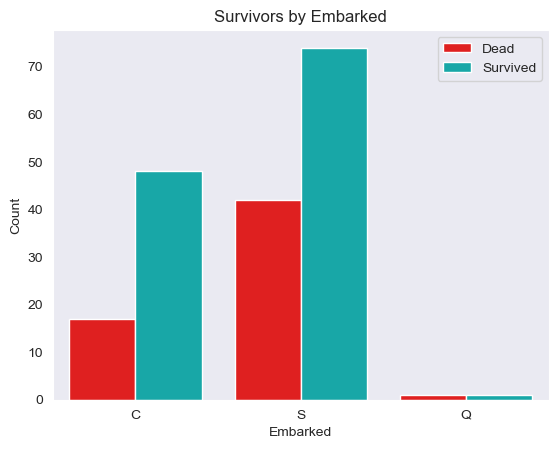

In [224]:
survival_by_gender = data.groupby('Embarked')['Survived'].sum()
colors = ["orange", "yellow"]
sns.countplot(x='Embarked', hue='Survived', data=data, palette=['r','c'])
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.title('Survivors by Embarked')
plt.legend(['Dead','Survived'])
plt.show()

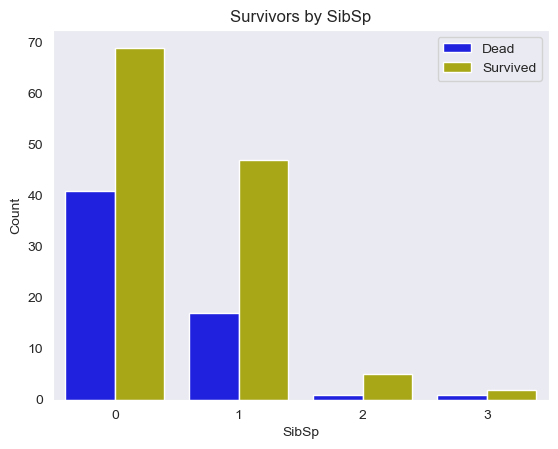

In [246]:

survival_by_gender = data.groupby('SibSp')['Survived'].sum()
colors = ["orange", "yellow"]
sns.countplot(x='SibSp', hue='Survived', data=data, palette=['b','y'])
plt.xlabel('SibSp')
plt.ylabel('Count')
plt.title('Survivors by SibSp')
plt.legend(['Dead','Survived'])
plt.show()

## conclusion:
>- female survived more than male
>- class1 survived more than class 2 and class 3. class3 survived less
>- Those who paid higher fares (first-class passengers) had a better chance of survival.
>- count of 0 and 1 sibling survived less